In [93]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv
/kaggle/input/stoke-data-engineered-features/stoke_data_engineered_features.csv


# About this dataset

##### Attribute Information (from dataset description)
1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [94]:
stroke_data = pd.read_csv("../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

In [95]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [96]:
unique_values = {"gender" : stroke_data.gender.unique(), 
                 "hypertension" : stroke_data.hypertension.unique(),
                 "heart_disease" : stroke_data.heart_disease.unique(),
                 "ever_married" : stroke_data.ever_married.unique(),
                 "work_type" : stroke_data.work_type.unique(),
                 "Residence_type" : stroke_data.Residence_type.unique(),
                 "smoking_status" : stroke_data.smoking_status.unique(),
                 "stroke" : stroke_data.stroke.unique()
                }


unique_values

{'gender': array(['Male', 'Female', 'Other'], dtype=object),
 'hypertension': array([0, 1]),
 'heart_disease': array([1, 0]),
 'ever_married': array(['Yes', 'No'], dtype=object),
 'work_type': array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
       dtype=object),
 'Residence_type': array(['Urban', 'Rural'], dtype=object),
 'smoking_status': array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
       dtype=object),
 'stroke': array([1, 0])}

In [97]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [98]:
stroke_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [99]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Handle Missing Data

* BMI column missing 201 entries

In [100]:
# check BMI variance against other columns
# with box-plot???

Filling missing values using means, where the means were found using a groupby function. This allows for hopefully more accurate mean imputation.

In [101]:
# grouped_means = stroke_data.groupby(["gender", "work_type", 
#                                      "smoking_status", "Residence_type"])["bmi"].mean()

# grouped_means = grouped_means.reset_index()
# grouped_means.rename(columns={"bmi":"bmi_average"}, inplace=True)

# grouped_means.head()

# gender = "Female"
# work_type = "Private"
# smoking_status = "smokes"
# Residence_type = "Rural"

# grouped_means[(grouped_means.gender == gender) & 
#               (grouped_means.work_type == work_type) & 
#               (grouped_means.smoking_status == smoking_status) & 
#               (grouped_means.Residence_type == Residence_type)]["bmi"].iloc[0]

In [102]:
# groupby these columns and calculate the mean of the bmi column for these groups
grouped_means = stroke_data.groupby(["gender", "work_type", 
                                     "smoking_status", "Residence_type"])["bmi"].mean()

# reset_index() makes it much easier to work with 
grouped_means = grouped_means.reset_index()

# stroke_data_copy = stroke_data.copy(deep=True)

# iterate through bmi column
# where value = NaN, fill with the grouped_by average value (grouped_means dataframe)
index = 0
for value in stroke_data['bmi']:
    if np.isnan(value):
        gender = stroke_data["gender"].iloc[index]
        work_type = stroke_data["work_type"].iloc[index]
        smoking_status = stroke_data["smoking_status"].iloc[index]
        Residence_type = stroke_data["Residence_type"].iloc[index]
        
        imputation_value = grouped_means[(grouped_means.gender == gender) & 
                                         (grouped_means.work_type == work_type) & 
                                         (grouped_means.smoking_status == smoking_status) & 
                                         (grouped_means.Residence_type == Residence_type)]["bmi"].iloc[0]
        
        stroke_data.at[index, 'bmi'] = imputation_value
    
    # increment index
    index += 1
        

In [103]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Exploratory Data Analysis

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='stroke', ylabel='count'>

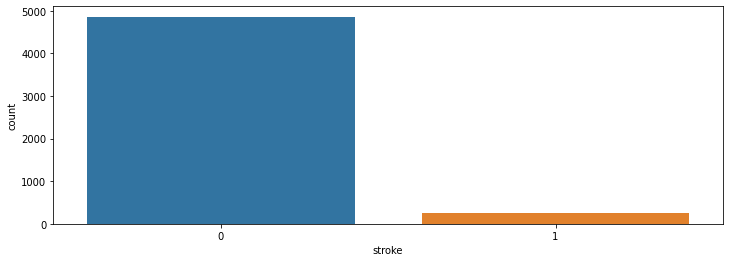

In [105]:
plt.figure(figsize=(12, 4))
sns.countplot(x='stroke', data = stroke_data)

['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']

In [106]:
# sns.histplot(data=stroke_data, x="avg_glucose_level", bins=15, palette="viridis")

<AxesSubplot:title={'center':'avg_glucose_level'}, xlabel='stroke', ylabel='avg_glucose_level'>

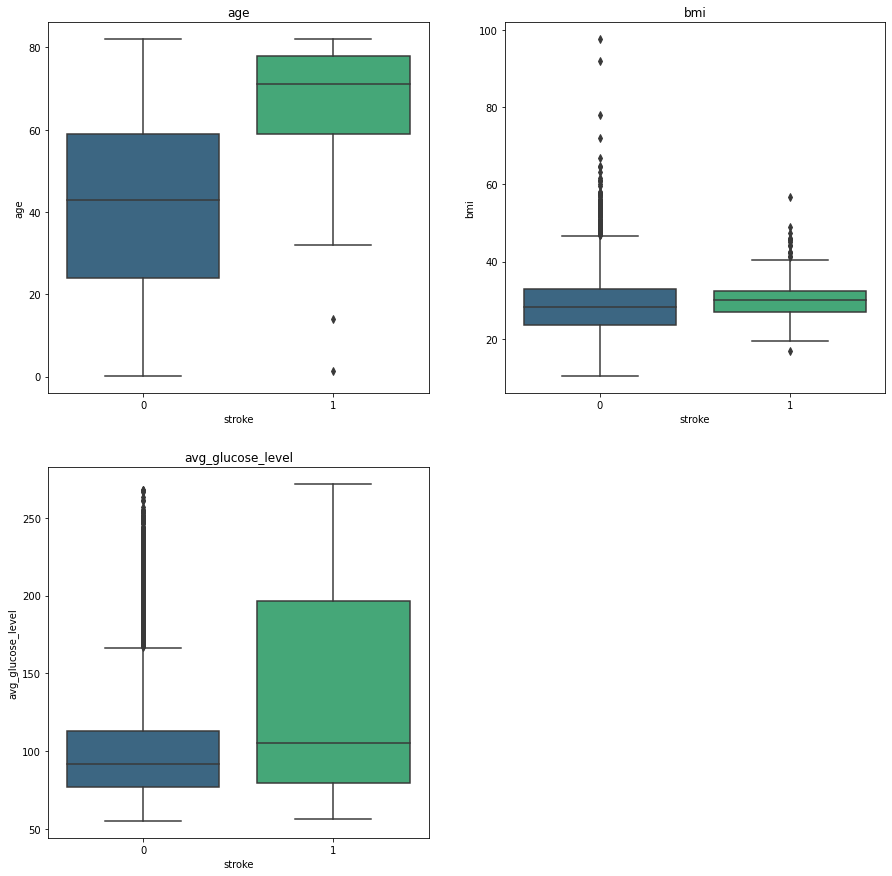

In [107]:
plt.figure(figsize=(15, 15))

plt.subplot(2,2,1)
plt.title("age")
sns.boxplot(x='stroke', y='age', data = stroke_data, palette='viridis')

plt.subplot(2,2,2)
plt.title("bmi")
sns.boxplot(x='stroke', y='bmi', data = stroke_data, palette='viridis')

plt.subplot(2,2,3)
plt.title("avg_glucose_level")
sns.boxplot(x='stroke', y='avg_glucose_level', data = stroke_data, palette='viridis')

# plt.subplot(2,2,4)
# plt.title("avg_glucose_level")
# sns.boxplot(x='stroke', y='avg_glucose_level', hue="smoking_status" , data = stroke_data, palette='viridis')

<AxesSubplot:xlabel='stroke', ylabel='count'>

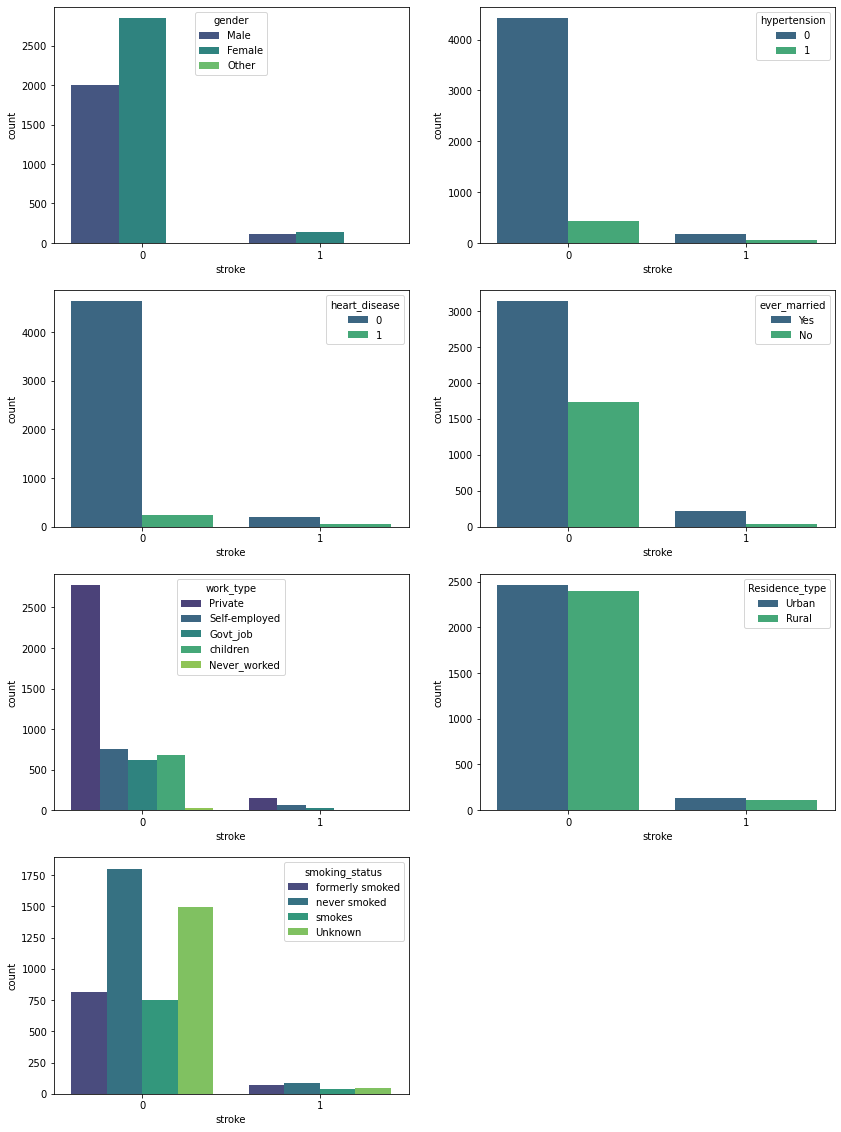

In [108]:
plt.figure(figsize=(14, 20))

# ['id', 'gender', 'age', 'hypertension', 'heart_disease', 
# 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 
# 'bmi', 'smoking_status', 'stroke']

plt.subplot(4,2,1)
# plt.title("Male = 1, Female = 0")
sns.countplot(x='stroke', hue='gender', data = stroke_data, palette='viridis')

plt.subplot(4,2,2)
sns.countplot(x='stroke', hue='hypertension', data = stroke_data, palette='viridis')

plt.subplot(4,2,3)
sns.countplot(x='stroke', hue='heart_disease', data = stroke_data, palette='viridis')

plt.subplot(4,2,4)
sns.countplot(x='stroke', hue='ever_married', data = stroke_data, palette='viridis')

plt.subplot(4,2,5)
sns.countplot(x='stroke', hue='work_type', data = stroke_data, palette='viridis')

plt.subplot(4,2,6)
sns.countplot(x='stroke', hue='Residence_type', data = stroke_data, palette='viridis')

plt.subplot(4,2,7)
sns.countplot(x='stroke', hue='smoking_status', data = stroke_data, palette='viridis')

# plt.subplot(4,2,8)
# sns.countplot(x='output', hue='thall', data = heart_data, palette='viridis')

<AxesSubplot:>

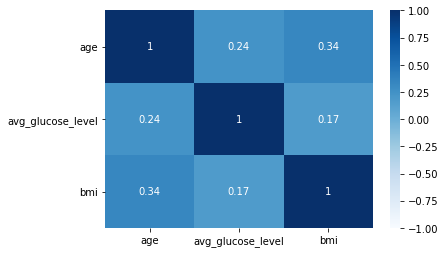

In [109]:
# plotting correlations of continuous variables

correlation_matrix = stroke_data[['age', 'avg_glucose_level','bmi']].corr()

sns.heatmap(correlation_matrix, vmin=-1.0, vmax=1.0, cmap="Blues",annot=True)

# Encoding categorical variables

In [110]:
# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder(categories=['gender', 'hypertension', 'heart_disease', 'ever_married', 
#                                      'work_type', 'Residence_type', 'smoking_status', 'stroke'])

# encoder.fit(stroke_data[['gender', 'hypertension', 'heart_disease', 'ever_married', 
#                                      'work_type', 'Residence_type', 'smoking_status', 'stroke']])

# stroke = encoder.transform(stroke_data[['gender', 'hypertension', 'heart_disease', 'ever_married', 
#                                      'work_type', 'Residence_type', 'smoking_status', 'stroke']])

In [111]:
def dummy_encode_and_concat(dataset, feature_list):

    for feature in feature_list:
        dummy_df = pd.get_dummies(dataset[feature], prefix=feature)

        dataset = pd.concat([dataset, dummy_df], axis=1)
    
    return dataset

In [112]:
categories_list = ["gender", "ever_married" ,"work_type", "Residence_type", "smoking_status"]

stroke_data = dummy_encode_and_concat(stroke_data, categories_list)

In [113]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   int64  
 1   gender                          5110 non-null   object 
 2   age                             5110 non-null   float64
 3   hypertension                    5110 non-null   int64  
 4   heart_disease                   5110 non-null   int64  
 5   ever_married                    5110 non-null   object 
 6   work_type                       5110 non-null   object 
 7   Residence_type                  5110 non-null   object 
 8   avg_glucose_level               5110 non-null   float64
 9   bmi                             5110 non-null   float64
 10  smoking_status                  5110 non-null   object 
 11  stroke                          5110 non-null   int64  
 12  gender_Female                   51

# Feature Engineering

#### Some Feature Engineering Methods
Ideas taken from this paper: [An Empirical Analysis of Feature Engineering for Predictive Modeling](https://arxiv.org/pdf/1701.07852.pdf)

* Feature_A - Feature_B
* Feature_A + Feature_B
* Feature_A * Feature_B
* Feature_A / Feature_B
* Feature_A^2 or Feature_A^3 or sqrt(Feature_A)
* Feature_A / Feature_B^2
* (Feature_A * Feature_B) / Feature_C^2
* log(Feature_A)
* (Feature_A - Feature_B)/(Feature_C - feature_D)
* distance formula: sqrt((Feature_A - Feature_B)^2 - (Feature_C - feature_D)^2)
* Feature_A - mean_of_A or (Feature_A - mean_of_A)^2 or log(Feature_A - mean_of_A)
* sqrt((Feature_A - mean_of_A)^2/Feature_B)

note: these methods are for engineering with continuous variables

In [114]:
def feature_engineer(dataset, output_column):
    # initialize new pandas dataframe
    engineered_df = pd.DataFrame({"target": output_column})
    
    summary_df = dataset.describe()
    
    columns = list(dataset.columns.values)
    for feature_a in columns:
        feature_a_mean = dataset[feature_a].mean()

        engineered_df["log_" + feature_a] = np.log(dataset[feature_a])

        engineered_df["squared_" + feature_a] = (dataset[feature_a])**2

        engineered_df["cubed_" + feature_a] = (dataset[feature_a])**3

        engineered_df[feature_a + "_minus_mean"] = dataset[feature_a] - feature_a_mean
        
        engineered_df["sqrt_" + feature_a] = (dataset[feature_a])**0.5
    
    for a in columns:
        mean_of_a = dataset[a].mean()
        for b in columns:
            if b != a:
                
                engineered_df[a + "_minus_" + b] = dataset[a] - dataset[b]
                
                engineered_df[a + "_plus_" + b] = dataset[a] + dataset[b]
                
                engineered_df[a + "_times_" + b] = dataset[a] * dataset[b]
                
                engineered_df[a + "_divided_by_" + b] = dataset[a] / dataset[b]
                
                engineered_df[a + "_std_dev_type_ratio_" + b] = np.sqrt(((dataset[a] - mean_of_a)**2) / dataset[b])
                
                engineered_df[a + "_divided_by_" + b + "_squared"] = dataset[a] / (dataset[b]**2)
                
    for a in columns:
        mean_of_a = dataset[a].mean()
        for b in columns:
            mean_of_b = dataset[b].mean()
            if b != a:
                for c in columns:
                    if c != a and c != b:
                        engineered_df[a + "_times_" + b + "_divided_by_" + c + "_squared"] = (dataset[a] * dataset[b]) / (dataset[c]**2)
                    
                    for d in columns:
                        if d != a and d != b and d != c:
                            a_minus_b = dataset[a] - dataset[b]
                            c_minus_d = dataset[c] - dataset[d]
                            
                            engineered_df[a + "_minus_" + b + "_divided_by_" + c + "_minus_" + d] = (a_minus_b) / (c_minus_d)
                            
                            engineered_df[a + "_" + b + "_" + c + "_" + d + "_distance_formula"] = np.sqrt((a_minus_b**2) / (c_minus_d**2))
    
    engineered_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    return engineered_df

In [115]:
# creating "engineered_data"
# engineered_data = feature_engineer(stroke_data[['age', 'avg_glucose_level', 'bmi']], 
#                                    stroke_data["stroke"])

In [116]:
# saving engineered_data as output file
# # note typo: 'stoke' instead of 'stroke'
# engineered_data.to_csv('stoke_data_engineered_features.csv', index=False)

# instead of creating it every time, I've saved it and imported it here
engineered_data = pd.read_csv("../input/stoke-data-engineered-features/stoke_data_engineered_features.csv")

In [117]:
engineered_data.head()

,target,log_age,squared_age,cubed_age,age_minus_mean,sqrt_age,log_avg_glucose_level,squared_avg_glucose_level,cubed_avg_glucose_level,avg_glucose_level_minus_mean,...,bmi_minus_age_divided_by_age_minus_avg_glucose_level,bmi_age_age_avg_glucose_level_distance_formula,bmi_times_age_divided_by_avg_glucose_level_squared,bmi_minus_age_divided_by_bmi_minus_avg_glucose_level,bmi_age_bmi_avg_glucose_level_distance_formula,bmi_times_avg_glucose_level_divided_by_age_squared,bmi_minus_avg_glucose_level_divided_by_avg_glucose_level_minus_age,bmi_avg_glucose_level_avg_glucose_level_age_distance_formula,bmi_minus_avg_glucose_level_divided_by_bmi_minus_age,bmi_avg_glucose_level_bmi_age_distance_formula
0,1,4.204693,4489.0,300763.0,23.773386,8.185353,5.432367,52299.1161,1.196028e+07,122.542323,...,0.188014,0.188014,0.046888,0.158259,0.158259,1.864570,-1.188014,1.188014,6.318750,6.318750
1,1,4.110874,3721.0,226981.0,17.773386,7.810250,5.309307,40888.8841,8.268141e+06,96.062323,...,0.223151,0.223151,0.043993,0.182440,0.182440,1.602507,-1.223151,1.223151,5.481263,5.481263
2,1,4.382027,6400.0,512000.0,36.773386,8.944272,4.662684,11219.0464,1.188321e+06,-0.227677,...,1.832562,1.832562,0.231749,0.646963,0.646963,0.537875,-2.832562,2.832562,1.545684,1.545684
3,1,3.891820,2401.0,117649.0,5.773386,7.000000,5.143008,29319.7129,5.020414e+06,65.082323,...,0.119447,0.119447,0.057490,0.106702,0.106702,2.453274,-1.119447,1.119447,9.371918,9.371918
4,1,4.369448,6241.0,493039.0,35.773386,8.888194,5.159745,30317.7744,5.278931e+06,67.972323,...,0.578217,0.578217,0.062538,0.366374,0.366374,0.669585,-1.578217,1.578217,2.729455,2.729455


In [118]:
# drop columns with any NaN values (these are columns where we divided by zero or has a log of 1 at some point)
engineered_data = engineered_data.loc[:, engineered_data.isnull().sum() == 0]

In [119]:
engineered_data.head()

,target,log_age,squared_age,cubed_age,age_minus_mean,sqrt_age,log_avg_glucose_level,squared_avg_glucose_level,cubed_avg_glucose_level,avg_glucose_level_minus_mean,...,avg_glucose_level_minus_bmi_divided_by_avg_glucose_level_minus_age,avg_glucose_level_bmi_avg_glucose_level_age_distance_formula,bmi_minus_age_divided_by_age_minus_avg_glucose_level,bmi_age_age_avg_glucose_level_distance_formula,bmi_times_age_divided_by_avg_glucose_level_squared,bmi_minus_age_divided_by_bmi_minus_avg_glucose_level,bmi_age_bmi_avg_glucose_level_distance_formula,bmi_times_avg_glucose_level_divided_by_age_squared,bmi_minus_avg_glucose_level_divided_by_avg_glucose_level_minus_age,bmi_avg_glucose_level_avg_glucose_level_age_distance_formula
0,1,4.204693,4489.0,300763.0,23.773386,8.185353,5.432367,52299.1161,1.196028e+07,122.542323,...,1.188014,1.188014,0.188014,0.188014,0.046888,0.158259,0.158259,1.864570,-1.188014,1.188014
1,1,4.110874,3721.0,226981.0,17.773386,7.810250,5.309307,40888.8841,8.268141e+06,96.062323,...,1.223151,1.223151,0.223151,0.223151,0.043993,0.182440,0.182440,1.602507,-1.223151,1.223151
2,1,4.382027,6400.0,512000.0,36.773386,8.944272,4.662684,11219.0464,1.188321e+06,-0.227677,...,2.832562,2.832562,1.832562,1.832562,0.231749,0.646963,0.646963,0.537875,-2.832562,2.832562
3,1,3.891820,2401.0,117649.0,5.773386,7.000000,5.143008,29319.7129,5.020414e+06,65.082323,...,1.119447,1.119447,0.119447,0.119447,0.057490,0.106702,0.106702,2.453274,-1.119447,1.119447
4,1,4.369448,6241.0,493039.0,35.773386,8.888194,5.159745,30317.7744,5.278931e+06,67.972323,...,1.578217,1.578217,0.578217,0.578217,0.062538,0.366374,0.366374,0.669585,-1.578217,1.578217


We can see that the number of columns dropped from 82 to 74, so we've dropped 8 columns.

#### Picking the Best of the Features we just Created

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(engineered_data.drop(columns=['target']),
                                                    engineered_data['target'], 
                                                    test_size=0.5, 
                                                    random_state=125)

##### Optimizing the Random Forest Classifier

In [121]:
# model = RandomForestClassifier()

# param_grid = {'max_depth': [10,20,30,40,50],
#              'n_estimators': [100,200,300,400,500],
#              #'min_samples_leaf':[100,200,300],
#              #'min_sample_split':[500,600,700],
#              'max_leaf_nodes':[5,10,20]}

# grid = GridSearchCV(model, param_grid, scoring='neg_mean_squared_log_error', cv=10)

In [122]:
# %%time

# grid.fit(X_train, y_train)
# # took 22min 45s to run

In [123]:
# grid.best_params_

***Best parameters***: {'max_depth': 40, 'max_leaf_nodes': 20, 'n_estimators': 200}

In [124]:
model = RandomForestClassifier(max_depth=40, max_leaf_nodes=20, n_estimators=200)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=40, max_leaf_nodes=20, n_estimators=200)

<AxesSubplot:>

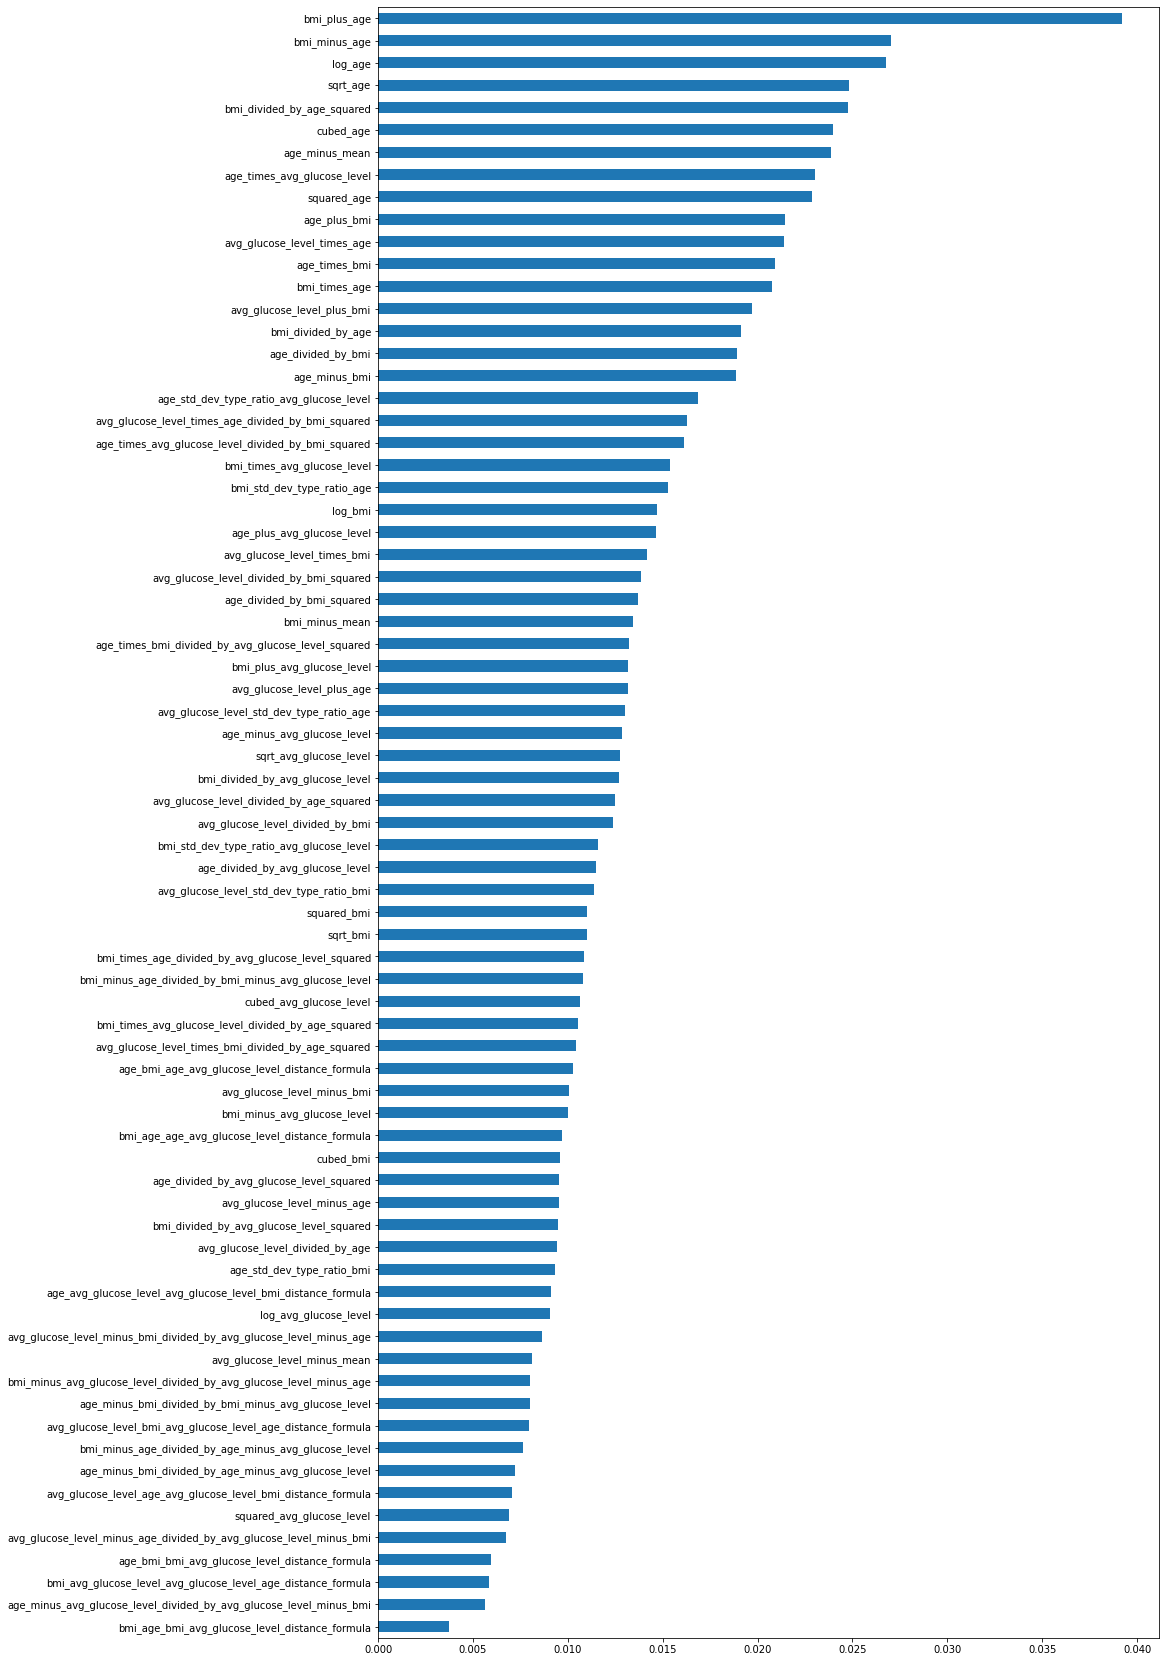

In [125]:
# importance = model.feature_importances_

# plotting the features with the highest importance score
plt.figure(figsize=(14, 30))
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
# feat_importances.nlargest(74).plot(kind='barh')
feat_importances.sort_values().plot(kind='barh')

In [126]:
# top 25 features
list_of_top_features = feat_importances.nlargest(25).index.tolist()

top_engineered_features = engineered_data[list_of_top_features]
top_engineered_features.head()

,bmi_plus_age,bmi_minus_age,log_age,sqrt_age,bmi_divided_by_age_squared,cubed_age,age_minus_mean,age_times_avg_glucose_level,squared_age,age_plus_bmi,...,age_divided_by_bmi,age_minus_bmi,age_std_dev_type_ratio_avg_glucose_level,avg_glucose_level_times_age_divided_by_bmi_squared,age_times_avg_glucose_level_divided_by_bmi_squared,bmi_times_avg_glucose_level,bmi_std_dev_type_ratio_age,log_bmi,age_plus_avg_glucose_level,avg_glucose_level_times_bmi
0,103.600000,-30.400000,4.204693,8.185353,0.008153,300763.0,23.773386,15322.23,4489.0,103.600000,...,1.830601,30.400000,1.572054,11.438256,11.438256,8370.054000,0.938454,3.600048,295.69,8370.054000
1,90.488793,-31.511207,4.110874,7.810250,0.007925,226981.0,17.773386,12334.81,3721.0,90.488793,...,2.068582,31.511207,1.249882,14.184645,14.184645,5962.928853,0.073029,3.384010,263.21,5962.928853
2,112.500000,-47.500000,4.382027,8.944272,0.005078,512000.0,36.773386,8473.60,6400.0,112.500000,...,2.461538,47.500000,3.573096,8.022343,8.022343,3442.400000,0.400433,3.481240,185.92,3442.400000
3,83.400000,-14.600000,3.891820,7.000000,0.014327,117649.0,5.773386,8390.27,2401.0,83.400000,...,1.424419,14.600000,0.441205,7.090209,7.090209,5890.312000,0.783083,3.538057,220.23,5890.312000
4,103.000000,-55.000000,4.369448,8.888194,0.003846,493039.0,35.773386,13755.48,6241.0,103.000000,...,3.291667,55.000000,2.711039,23.881042,23.881042,4178.880000,0.553365,3.178054,253.12,4178.880000


In [127]:
# top_engineered_features = engineered_data[list_of_top_features]

## Combine Engineered Features with Original Dataset

 First, drop original(non-numeric) categorical variables along with redundant dummy variables.

In [128]:
# stroke_data.columns.tolist()

stroke_data.drop(columns=['gender', 
                          'hypertension', 
                          'heart_disease', 
                          'ever_married', 
                          'work_type', 
                          'Residence_type', 
                          'smoking_status', 
                          'gender_Other', 
                          'ever_married_No', 
                          'work_type_Never_worked', 
                          'Residence_type_Rural', 
                          'smoking_status_Unknown'], inplace=True)

In [129]:
# stroke_data.columns.tolist()
# moving 'stroke' column to front of dataframe
# new_column_order = ['id', 'stroke','gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status','gender_Female','gender_Male','gender_Other','ever_married_No','ever_married_Yes','work_type_Govt_job','work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children','Residence_type_Rural','Residence_type_Urban','smoking_status_Unknown','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes']

# stroke_data = stroke_data[new_column_order]

stroke_data.head()

,id,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,228.69,36.600000,1,0,1,1,0,1,0,0,1,1,0,0
1,51676,61.0,202.21,29.488793,1,1,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,105.92,32.500000,1,0,1,1,0,1,0,0,0,0,1,0
3,60182,49.0,171.23,34.400000,1,1,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,174.12,24.000000,1,1,0,1,0,0,1,0,0,0,1,0


#### Combining stroke_data with top_engineered_features

Note: We took the top 25 engineered features

In [130]:
stroke_data_engineered = pd.concat([stroke_data, top_engineered_features], axis=1)

In [131]:
stroke_data_engineered.head()

,id,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_Yes,work_type_Govt_job,work_type_Private,...,age_divided_by_bmi,age_minus_bmi,age_std_dev_type_ratio_avg_glucose_level,avg_glucose_level_times_age_divided_by_bmi_squared,age_times_avg_glucose_level_divided_by_bmi_squared,bmi_times_avg_glucose_level,bmi_std_dev_type_ratio_age,log_bmi,age_plus_avg_glucose_level,avg_glucose_level_times_bmi
0,9046,67.0,228.69,36.600000,1,0,1,1,0,1,...,1.830601,30.400000,1.572054,11.438256,11.438256,8370.054000,0.938454,3.600048,295.69,8370.054000
1,51676,61.0,202.21,29.488793,1,1,0,1,0,0,...,2.068582,31.511207,1.249882,14.184645,14.184645,5962.928853,0.073029,3.384010,263.21,5962.928853
2,31112,80.0,105.92,32.500000,1,0,1,1,0,1,...,2.461538,47.500000,3.573096,8.022343,8.022343,3442.400000,0.400433,3.481240,185.92,3442.400000
3,60182,49.0,171.23,34.400000,1,1,0,1,0,1,...,1.424419,14.600000,0.441205,7.090209,7.090209,5890.312000,0.783083,3.538057,220.23,5890.312000
4,1665,79.0,174.12,24.000000,1,1,0,1,0,0,...,3.291667,55.000000,2.711039,23.881042,23.881042,4178.880000,0.553365,3.178054,253.12,4178.880000


In [132]:
stroke_data_engineered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 41 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   id                                                  5110 non-null   int64  
 1   age                                                 5110 non-null   float64
 2   avg_glucose_level                                   5110 non-null   float64
 3   bmi                                                 5110 non-null   float64
 4   stroke                                              5110 non-null   int64  
 5   gender_Female                                       5110 non-null   uint8  
 6   gender_Male                                         5110 non-null   uint8  
 7   ever_married_Yes                                    5110 non-null   uint8  
 8   work_type_Govt_job                                  5110 non-null   uint8  
 9

In [134]:
stroke_data_engineered.to_csv('stroke_data_engineered_2.csv', index=False)